### Inside EPL 20/21: A Data Analysis Perspective
_The goal of this analysis is to delve into the performance trends and key insights from the English Premier League 20/21 season. By examining various statistical metrics, including goals scored, assists, possession, and defensive capabilities, the analysis aims to uncover patterns that defined the season. The focus is on identifying standout performers, team strategies, and factors that influenced match outcomes. Through this analysis, a comprehensive overview of the season's dynamics will be provided, offering valuable insights for football enthusiasts, analysts, and clubs alike_



#### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown

In [52]:
def displaytext(title, list):
    display(Markdown(f"##### {title}"))
    display(list)

#### Reading the data

In [3]:
df = pd.read_csv("EPL_20_21.csv")

In [4]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0


#### "Minutes Per Match"  & "Goals Per Match"


_Create two columns: "Minutes Per Match"  & "Goals Per Match_

In [5]:
df["MinutesPerMatch"] = (df.Mins / df.Matches).astype(int)
df["GoalsPerMatch"] = (df.Goals / df.Matches).astype(float) 

In [6]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000


#### Total Goals
_Total Goals Scored During the Campaign_

In [7]:
total_goals = df.Goals.sum()
total_goals

986

#### Penalty Attempts
_Total Penalty Attempts_

In [8]:
penalty_attempted = df.Penalty_Attempted.sum()
penalty_attempted

125

#### Penalty Goals
_Total Penalty Goals Scored_

In [9]:
penalty_goals = df.Penalty_Goals.sum()
penalty_goals

102

#### Pie Chart of Penalty Missed vs Scored

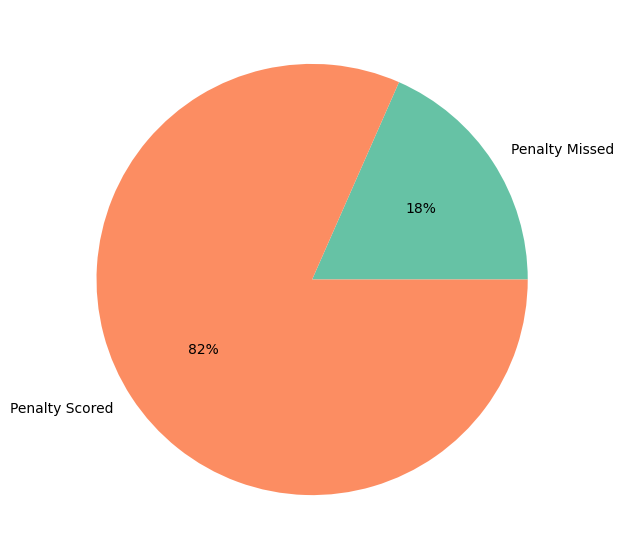

In [10]:
plt.figure(figsize=(14, 7))
pen_missed = penalty_attempted - penalty_goals
data = [pen_missed, penalty_goals]
labels = ["Penalty Missed", "Penalty Scored"]
color = sns.color_palette("Set2")
plt.pie(data, labels = labels, colors = color, autopct = "%.0f%%")
plt.show()

#### Chart of Goals Scored with Assists vs Without Assists

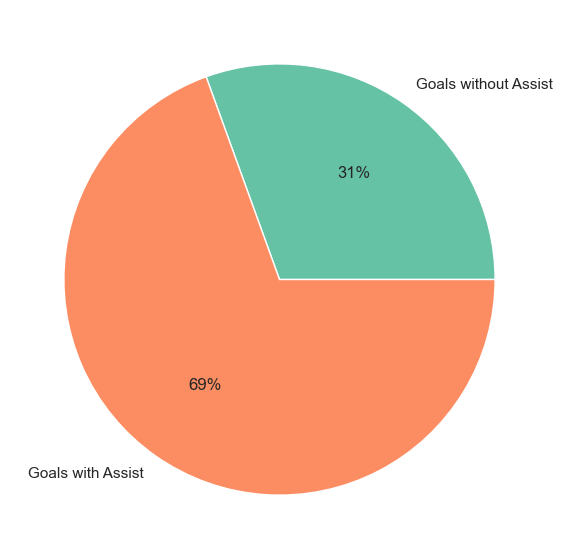

In [554]:
plt.figure(figsize=(14,7))
assists = df.Assists.sum()
data = [total_goals - assists, assists]
label = ["Goals without Assist", "Goals with Assist"]
color = sns.color_palette("Set2")
plt.pie(data, labels = label, colors = color, autopct = "%.0f%%")
plt.show()

In [11]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000


#### Number of Unique Countries Represented in the Campaign

In [12]:
np.size((df.Nationality).unique())

59

#### How Various Countries were Represented During the Campaign

In [319]:
nationality = df.groupby("Nationality").size().to_frame()
nationality

,0
Nationality,
ALG,3
ARG,8
AUS,4
AUT,1
BEL,11
BFA,1
BIH,1
BRA,27
CAN,1


#### Countries with the Most Representation 

<Axes: xlabel='Nationality'>

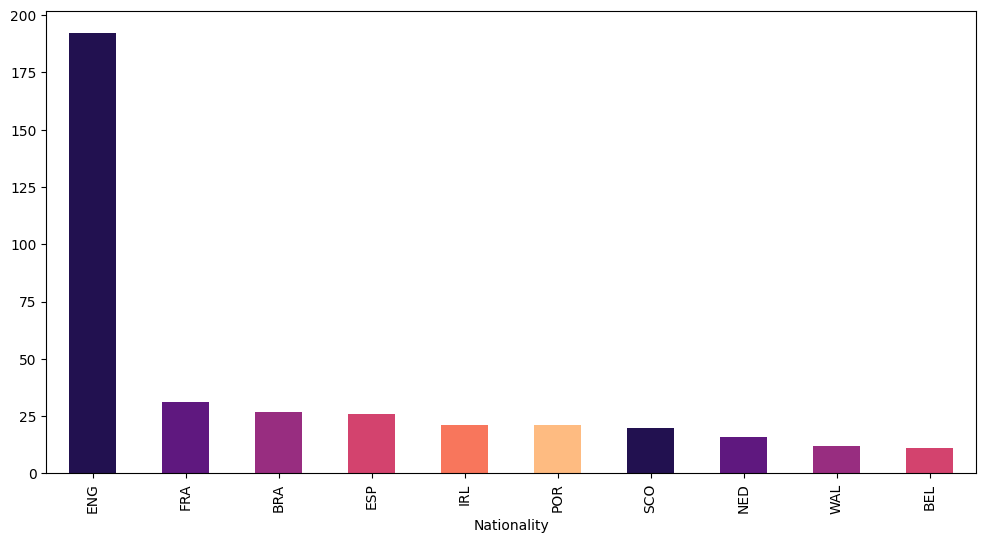

In [14]:
nationality = df.groupby("Nationality").size().sort_values(ascending = False)
nationality.head(10).plot(kind = 'bar', figsize=(12,6), color = sns.color_palette("magma"))

In [15]:
# Observing the data
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000


#### Ranking of Clubs by Squad Numbers

(0.0, 35.0)

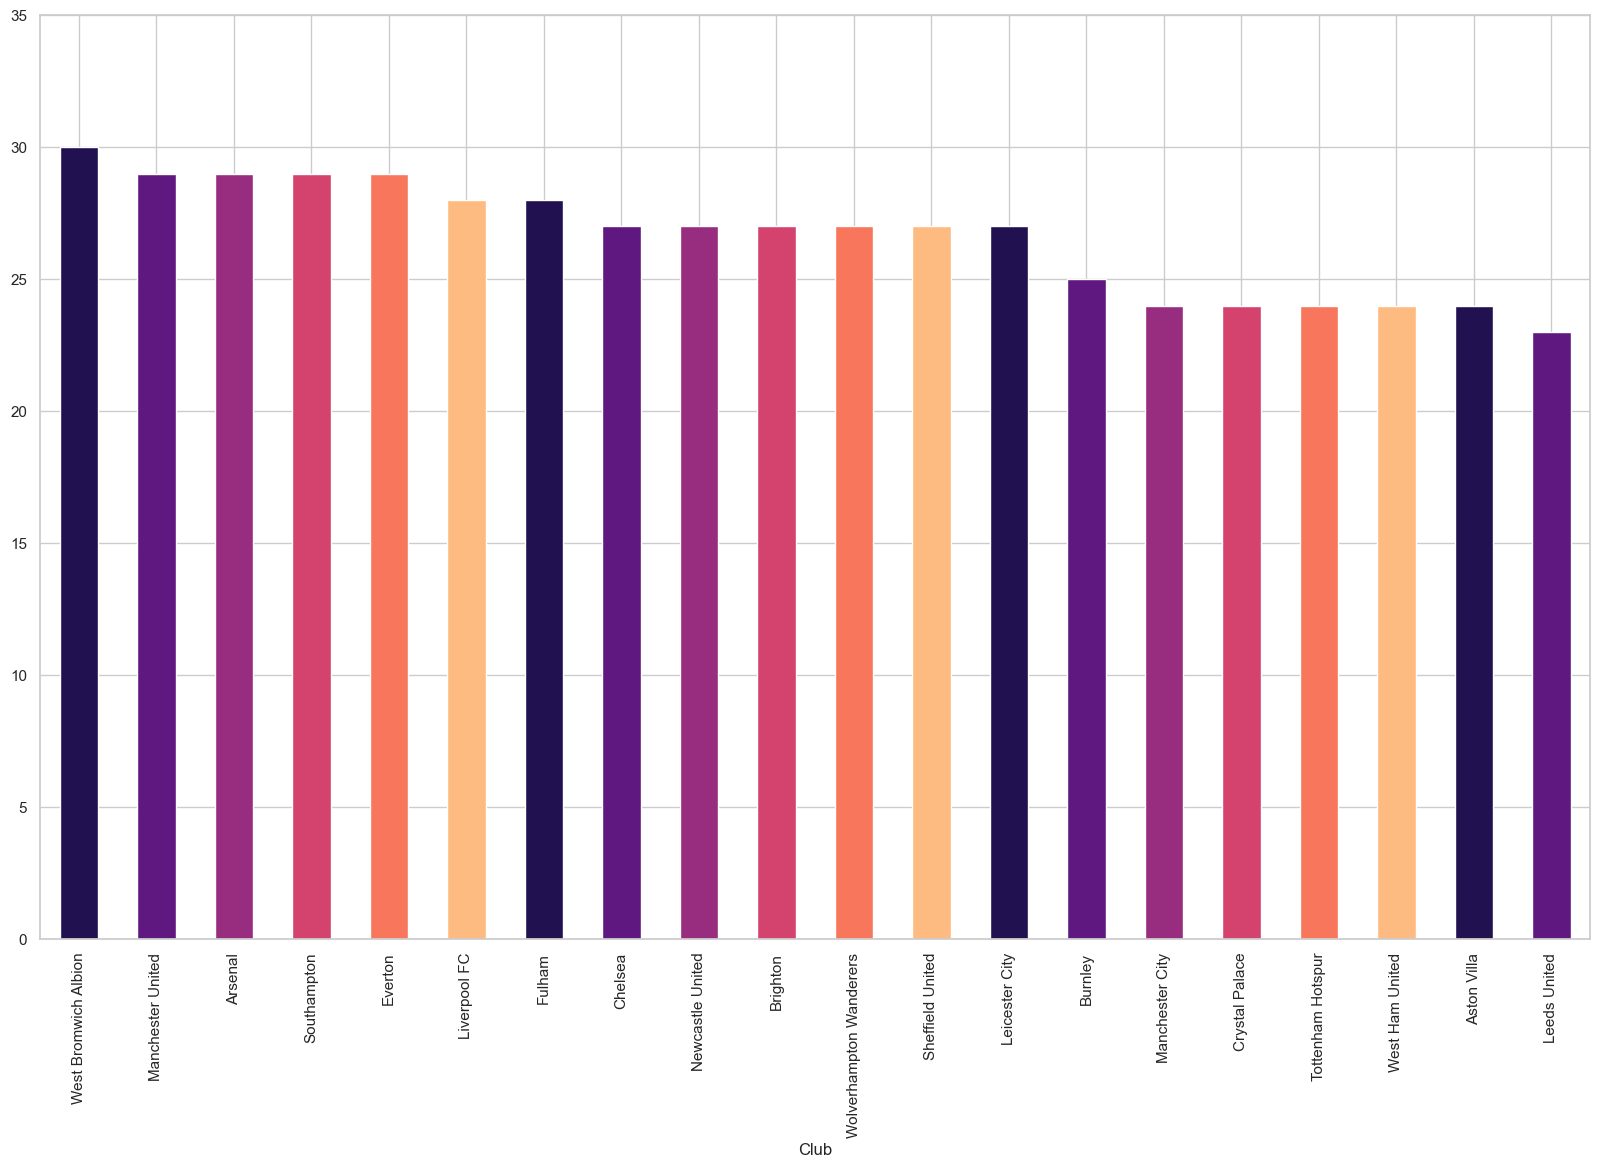

In [327]:
# df.groupby("Club").Name.sum()
df.Club.value_counts().plot(kind = "bar", color = sns.color_palette("magma"))
sns.set_style("whitegrid")
plt.ylim(0, 35)

#### Ranking Clubs by Squad Numbers - Bottom 5

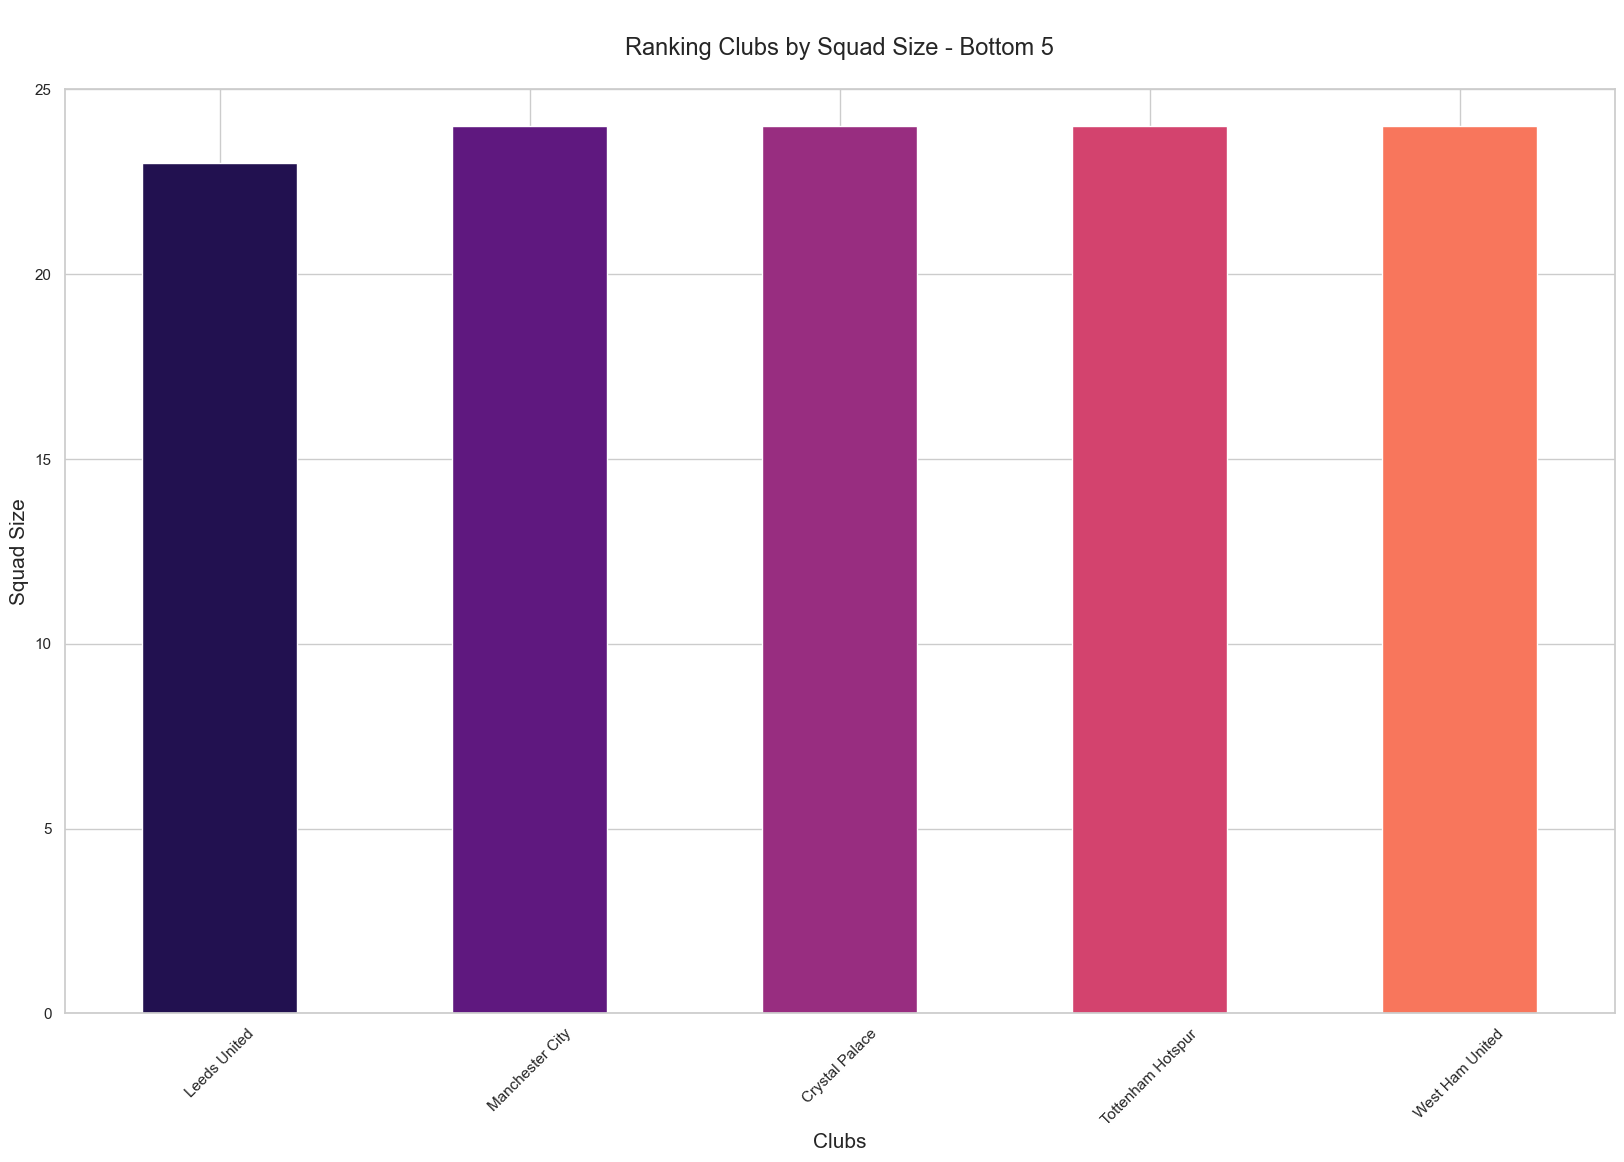

In [536]:
df.Club.value_counts().nsmallest(5).plot(kind = "bar", color = sns.color_palette("magma"))
sns.set_style("whitegrid")
plt.ylim(0, 25)
plt.xticks(rotation=45)

plt.title("\nRanking Clubs by Squad Size - Bottom 5\n", fontsize=17)
plt.xlabel("Clubs", fontsize=15)
plt.ylabel("Squad Size", fontsize=15)

plt.show()

In [18]:
# Observing the data
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000


#### Age Binning (U20, U25, U30 & >30)

##### Under 20

In [537]:
under20 = df[df.Age <= 20]

##### Under 25

In [538]:
under25 = df[(df.Age > 20) & (df.Age <=25)] 

##### Under 30

In [539]:
under30 = df[(df.Age > 25) & (df.Age <=30)] 

##### Players Above 30

In [540]:
above30 = df[df.Age > 30]

#### Pie Chart Showing Players Size by Age Group

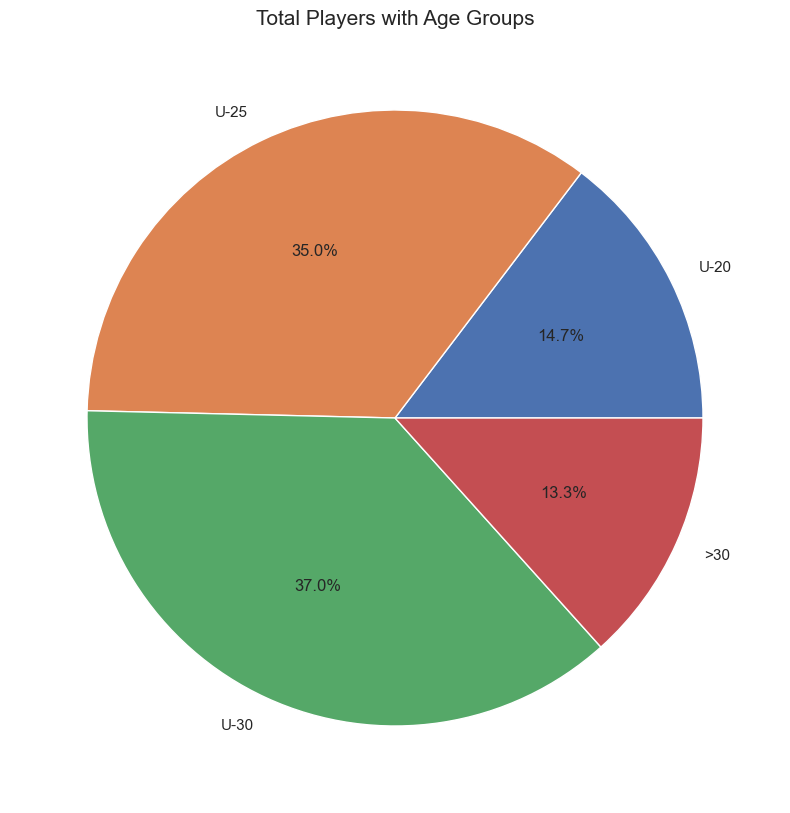

In [542]:
fig, ax = plt.subplots(figsize=(10, 10))

x = np.array([under20["Name"].count(), under25["Name"].count(), under30["Name"].count(), above30["Name"].count()])
mylabels = ["U-20", "U-25", "U-30", ">30"]

plt.title("Total Players with Age Groups", fontsize = 15)
plt.pie(x, labels = mylabels, autopct = "%.1f%%")

plt.show()

#### Under-20 Players Stats

In [567]:
under20.loc[:, "Goals Contribution"] = under20.Goals + under20.Assists

under20stats_top10 = under20.groupby("Name").agg({"Goals Contribution": "first", "Goals": "sum", "Assists": "sum"}).nlargest(10, "Goals Contribution").reset_index()
title = "Ranking U20 Players by Goals Contribution"

displaytext(title, under20stats_top10)

##### Ranking U20 Players by Goals Contribution

,Name,Goals Contribution,Goals,Assists
0,Phil Foden,14,9,5
1,Pedro Neto,11,5,6
2,Ferrán Torres,9,7,2
3,Mason Greenwood,9,7,2
4,Bukayo Saka,8,5,3
5,Dwight McNeil,7,2,5
6,Fábio Silva,7,4,3
7,Emile Smith-Rowe,6,2,4
8,Callum Hudson-Odoi,5,2,3
9,Conor Gallagher,4,2,2


#### Under-25 Players Stats

In [398]:
under25.loc[:, "Goals Contribution"] = under25.Goals + under25.Assists

under25stats_top10 = under25.groupby("Name").agg({"Goals Contribution": "first", "Goals": "sum", "Assists": "sum"}).nlargest(10, "Goals Contribution").reset_index()
title = "Ranking U25 Players by Goals Contribution"
displaytext(title, under25stats_top10)

##### Ranking U25 Players by Goals Contribution

,Name,Goals Contribution,Goals,Assists
0,Bruno Fernandes,30,18,12
1,Marcus Rashford,20,11,9
2,Ollie Watkins,19,14,5
3,Matheus Pereira,17,11,6
4,Raheem Sterling,17,10,7
5,Dominic Calvert-Lewin,16,16,0
6,Jack Grealish,16,6,10
7,Jack Harrison,16,8,8
8,James Ward-Prowse,15,8,7
9,Raphael Dias Belloli,15,6,9


#### Under-30 Players Stats

In [400]:
under30.loc[:, "Goals Contribution"] = under30.Goals + under25.Assists

under30stats_top10 = under30.groupby("Name").agg({"Goals Contribution": "first", "Goals": "sum", "Assists": "sum"}).nlargest(10, "Goals Contribution").reset_index()
title = "Ranking U30 Players by Goals Contribution"
displaytext(title, under30stats_top10)

##### Ranking U30 Players by Goals Contribution

,Name,Goals Contribution,Goals,Assists
0,Aaron Cresswell,NaN,0,8
1,Abdoulaye Doucouré,NaN,2,3
2,Ahmed Hegazi,NaN,0,0
3,Alex McCarthy,NaN,0,0
4,Alex Oxlade-Chamberlain,NaN,1,1
5,Alex Telles,NaN,0,2
6,Alexandre Lacazette,NaN,13,2
7,Alireza Jahanbakhsh,NaN,0,1
8,Alisson,NaN,1,0
9,Allan,NaN,0,0


#### Above-30 Players Stats

In [402]:
above30.loc[:, "Goals Contribution"] = above30.Goals + above30.Assists

above30stats_top10 = above30.groupby("Name").agg({"Goals Contribution": "first", "Goals": "sum", "Assists": "sum"}).nlargest(10, "Goals Contribution").reset_index()
title = "Ranking Above-30 Players by Goals Contribution"
displaytext(title, above30stats_top10)

##### Ranking Above-30 Players by Goals Contribution

,Name,Goals Contribution,Goals,Assists
0,Jamie Vardy,24,15,9
1,Edinson Cavani,13,10,3
2,Gareth Bale,13,11,2
3,Pierre-Emerick Aubameyang,13,10,3
4,David McGoldrick,9,8,1
5,Willian,6,1,5
6,Sergio Agüero,5,4,1
7,Jonny Evans,4,2,2
8,Olivier Giroud,4,4,0
9,Angelo Ogbonna,3,3,0


#### Pie Chart Showing Distribution of Goals Scored by Age Groups

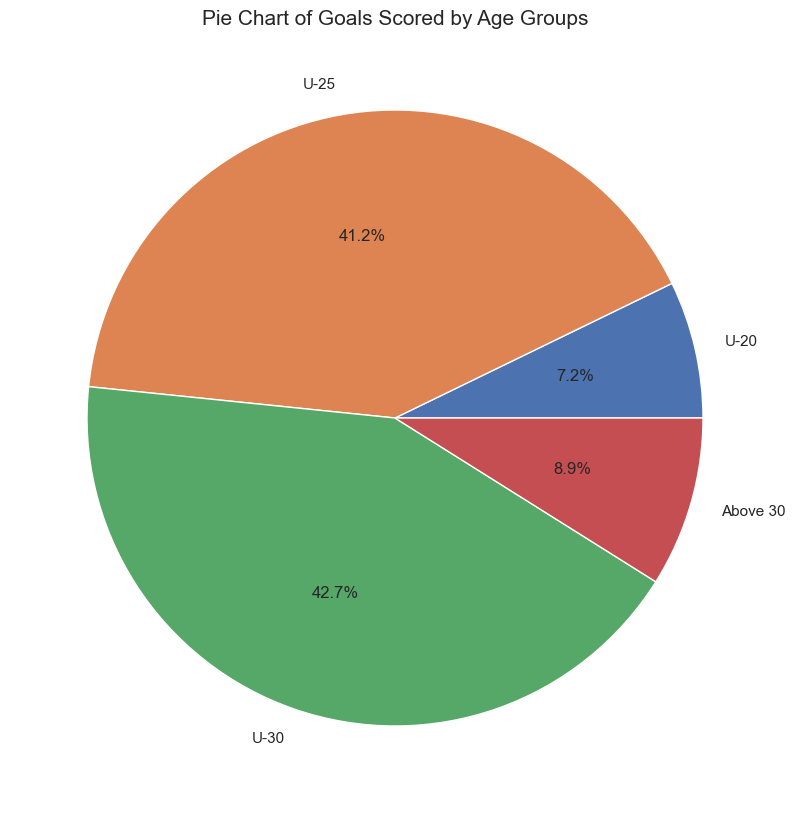

In [558]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array([under20["Goals"].sum(), under25["Goals"].sum(), under30["Goals"].sum(), above30["Goals"].sum()])

mylabels = ["U-20", "U-25", "U-30", "Above 30"]
plt.title("Pie Chart of Goals Scored by Age Groups", fontsize = 15)
plt.pie(x, labels = mylabels, autopct = "%.1f%%")

plt.show()

#### Distribution of U-20 Players by Club

<Axes: xlabel='Club'>

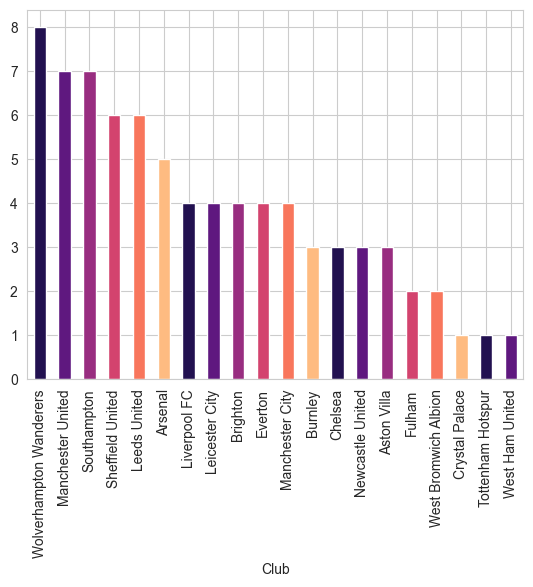

In [24]:
df[df.Age <= 20].Club.value_counts().plot(kind = 'bar', color = sns.color_palette("magma"))

#### Average Age of Players in Each Club

In [561]:
avg_age_plyr = df.groupby("Club").Age.sum()/df.groupby("Club").size()
avg_age_plyr = avg_age_plyr.round(1)
mean_age = avg_age_plyr.sort_values(ascending = False ).reset_index()
mean_age.columns = ["Club", "Mean Age"]

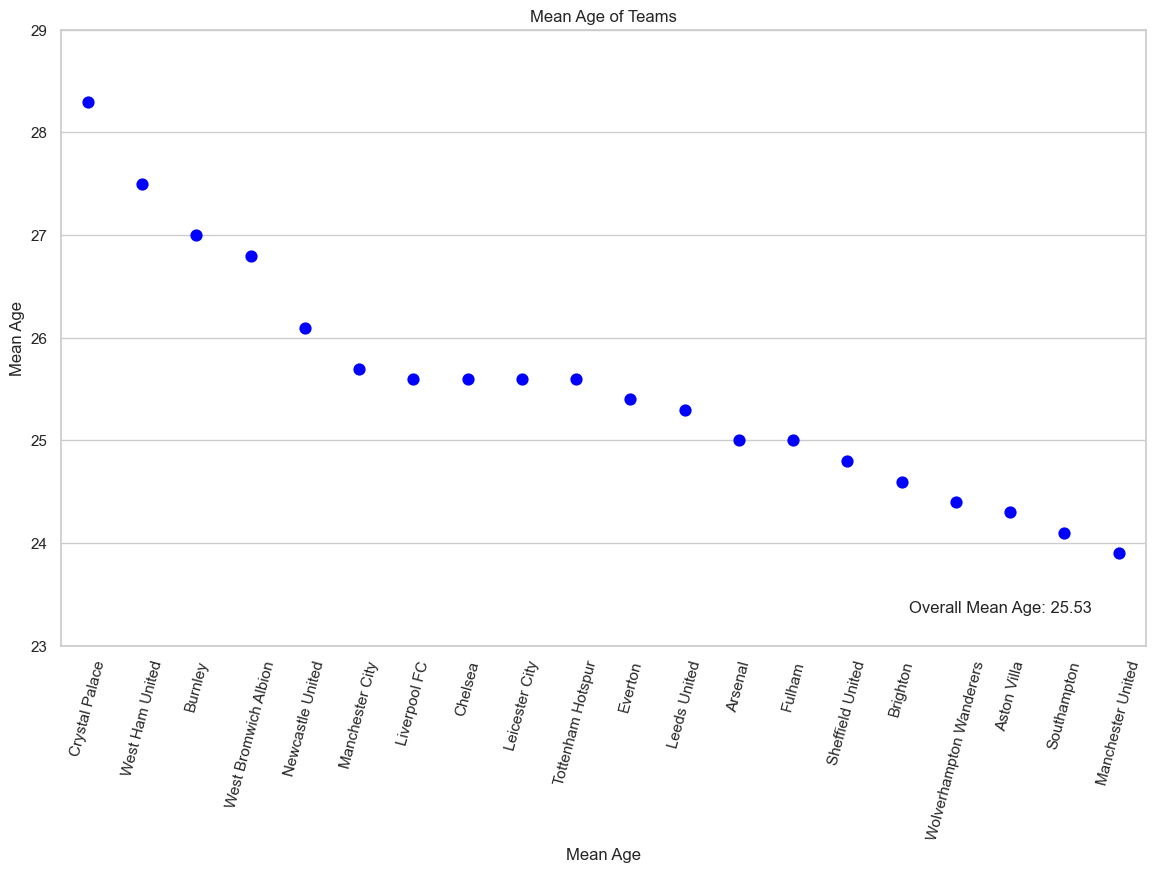

In [562]:
plt.figure(figsize=(14, 8))
sns.pointplot(x=mean_age.Club, y=mean_age["Mean Age"], data=df, linestyles="none", color='blue', markers='o')

plt.xlabel('Mean Age')
plt.xticks(rotation=75)
plt.yticks(range(23,30))
plt.title('Mean Age of Teams')

mean_age_mean = mean_age['Mean Age'].mean()

plt.text(0.95, 0.05, f'Overall Mean Age: {mean_age_mean}', 
         horizontalalignment='right', 
         verticalalignment='bottom', 
         transform=plt.gca().transAxes)

plt.show()

#### Squad Age Comparison: Youngest Teams

##### Under 20 players in Man United

In [565]:
under20[under20.Club == "Manchester United"]["Name"].to_frame()

,Name
61,Mason Greenwood
72,Brandon Williams
73,Amad Diallo
74,Anthony Elanga
76,Shola Shoretire
78,Hannibal Mejbri
79,William Thomas Fish


##### Under 20 players in Southampton

In [348]:
under20[under20.Club == "Southampton"]["Name"].to_frame()

,Name
385,William Smallbone
388,Kayne Ramsey
389,Jake Vokins
390,Alexandre Jankewitz
392,Michael Obafemi
393,Caleb Watts
394,Allan Tchaptchet


#### Box Plot Distribution of Ages

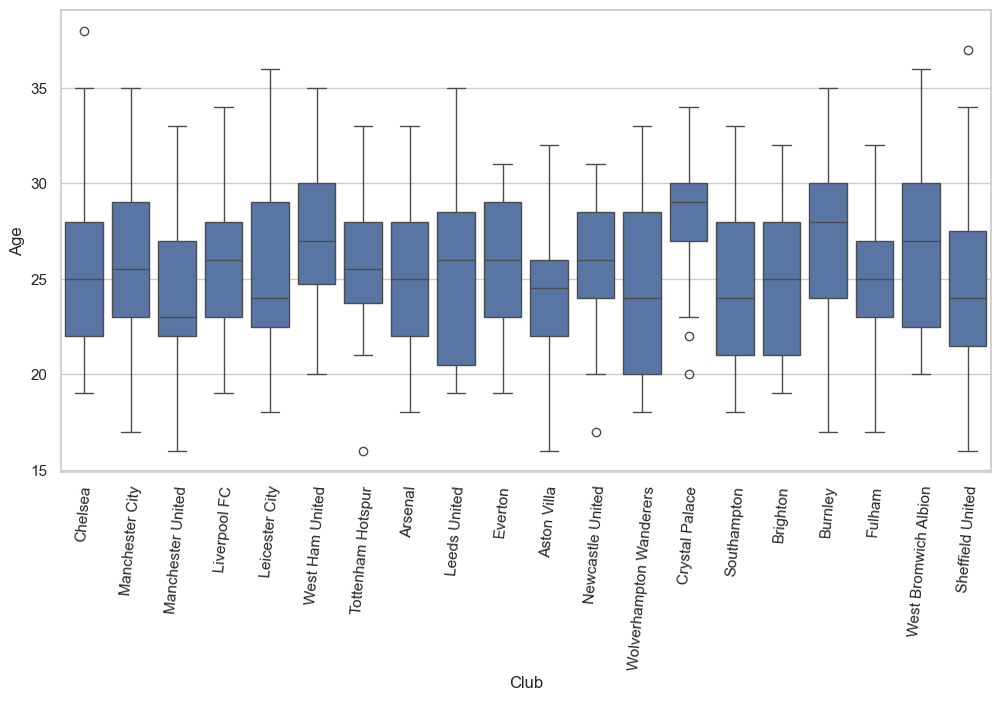

In [549]:
# Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(x = "Club", y = "Age", data = df)
plt.xticks(rotation = 85)
plt.show()

#### Goals and Assists Ranking

In [31]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000


In [157]:
team_ass = df.groupby("Club").Assists.sum().sort_values(ascending = False).to_frame()
title = "Club Ranking by Assists"
displaytext(title, team_ass)

##### Club Ranking by Assists

,Assists
Club,
Manchester City,55
Manchester United,51
Tottenham Hotspur,50
West Ham United,46
Leeds United,45
Leicester City,45
Liverpool FC,43
Aston Villa,38
Arsenal,38


In [297]:
clubs_stat = df.groupby("Club").agg({"Goals": "sum", "Assists": "sum"}).reset_index()

#### Club Ranking by Assists

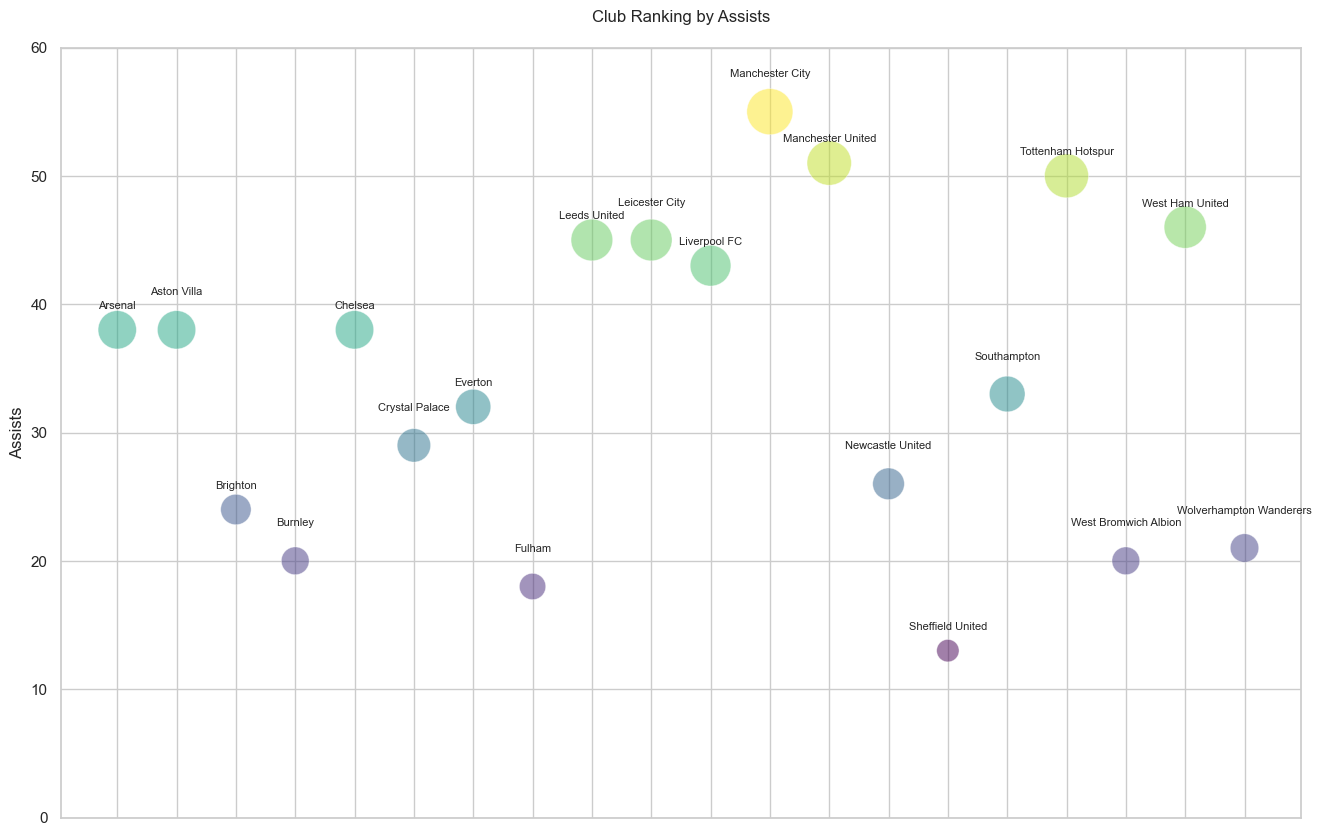

In [435]:
fig, ax = plt.subplots(figsize=(16, 10))

bubble_sizes = [ assists * 20 for assists in clubs_stat["Assists"]]
scatter = ax.scatter(clubs_stat["Club"], clubs_stat["Assists"], s=bubble_sizes, alpha=0.5, c=bubble_sizes, cmap='viridis', edgecolors='w', linewidth=0.5)

# labels and title
plt.ylabel('Assists')
plt.title('Club Ranking by Assists\n', fontsize=12)
plt.xticks(rotation=90)

for i, team in enumerate(clubs_stat["Club"]):
    y_offset = 15 if i % 2 == 0 else 25
    ax.annotate(team, (clubs_stat["Club"][i], clubs_stat["Assists"][i]), textcoords="offset points", xytext=(0, y_offset), ha='center', fontsize=8)

ax.set_xticks(range(len(clubs_stat["Club"])))
ax.set_xticklabels([])

plt.yticks([i * 10 for i in range(0, 7)])

plt.show()


#### Club Ranking by Goals

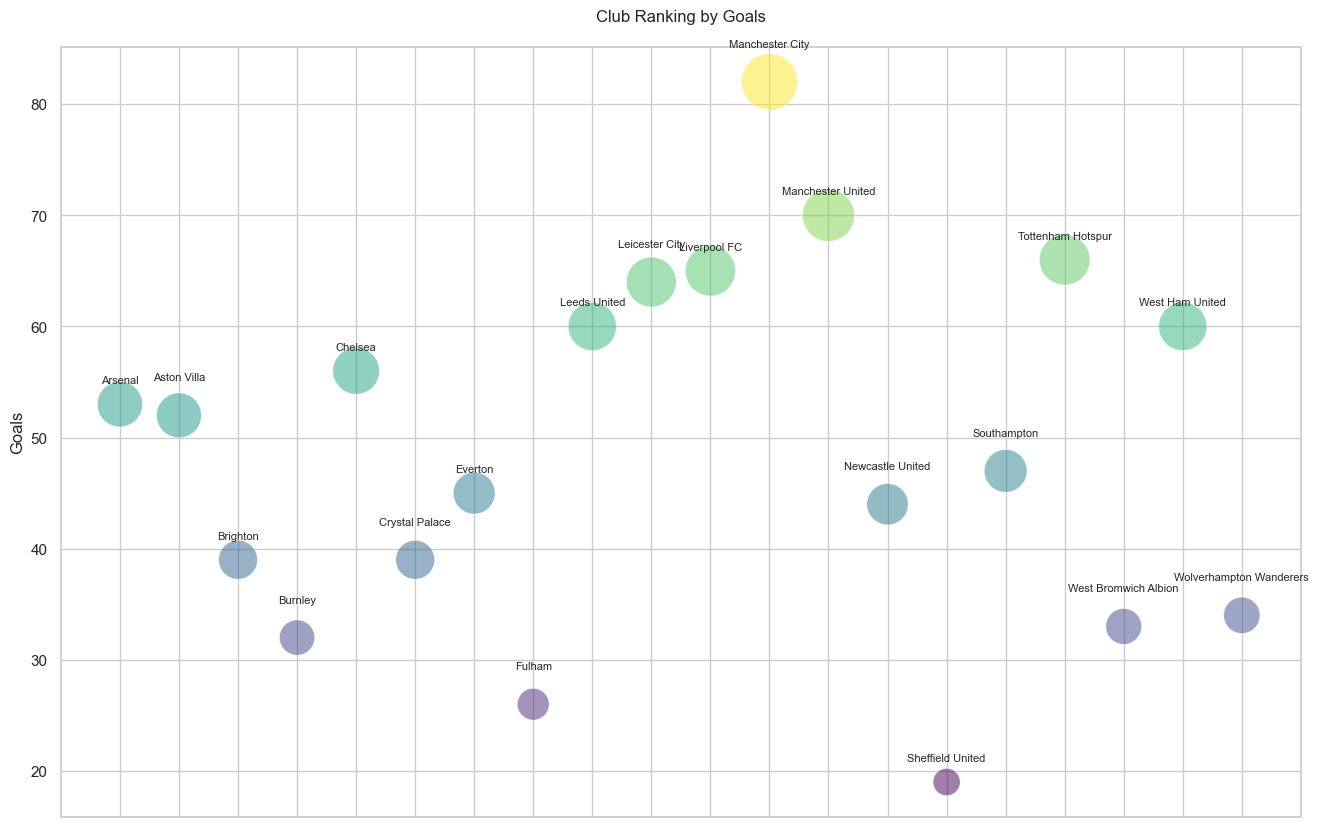

In [350]:
fig, ax = plt.subplots(figsize=(16, 10))

bubble_sizes = [goals * 20 for goals in clubs_stat["Goals"]]  
scatter = ax.scatter(clubs_stat["Club"], clubs_stat["Goals"], s=bubble_sizes, alpha=0.5, c=bubble_sizes, cmap='viridis', edgecolors='w', linewidth=0.5)

# labels and title
plt.ylabel('Goals')
plt.title('Club Ranking by Goals\n', fontsize=12)
plt.xticks(rotation=90)

for i, team in enumerate(clubs_stat["Club"]):
    y_offset = 15 if i % 2 == 0 else 25
    ax.annotate(team, (clubs_stat["Club"][i], clubs_stat["Goals"][i]), textcoords="offset points", xytext=(0, y_offset), ha='center', fontsize=8)

ax.set_xticks(range(len(clubs_stat["Club"])))
ax.set_xticklabels([])

plt.xlim(-1, len(clubs_stat["Club"]))

plt.show()


#### Players Ranking by Goals

In [298]:
players_stat = df.groupby("Name").agg({"Goals": "sum", "Assists": "sum"}).reset_index()

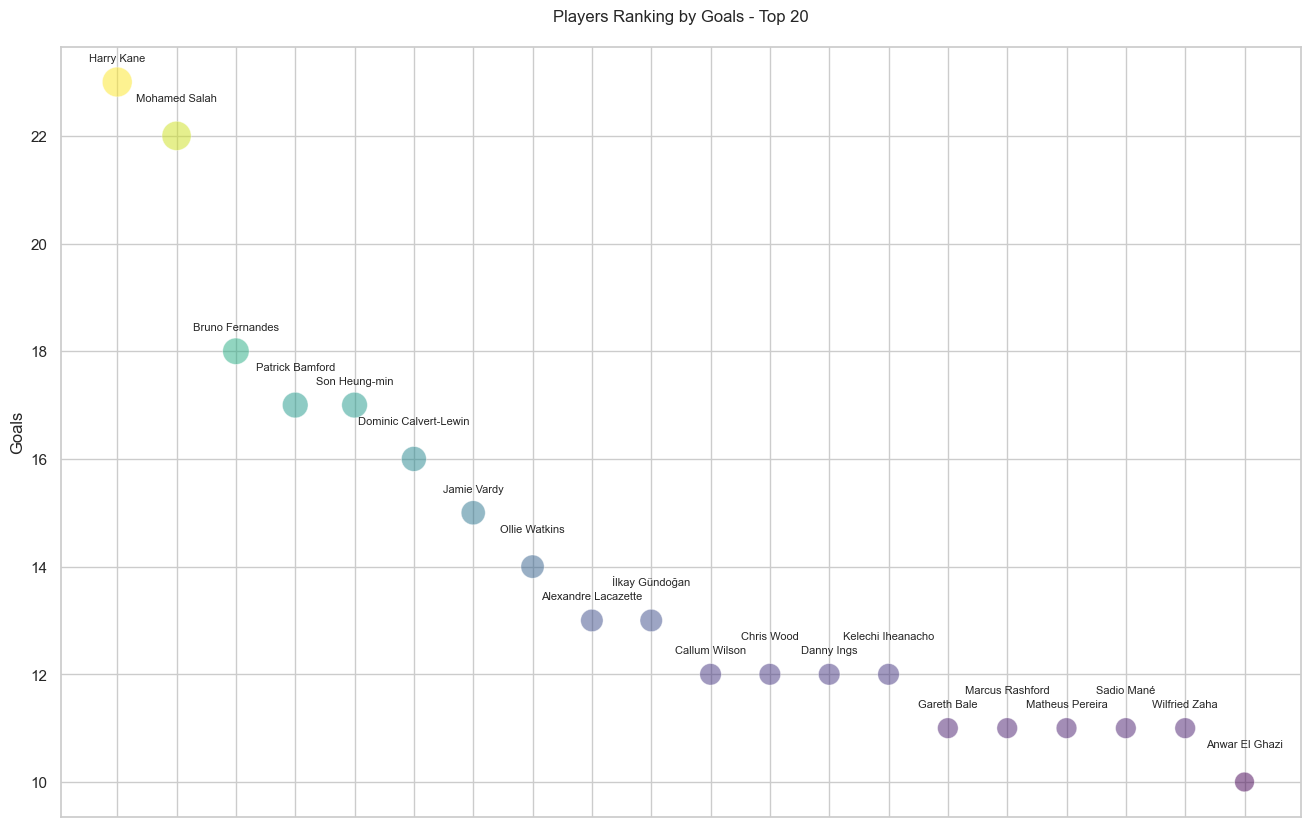

In [606]:
top20goals_plyr = players_stat.nlargest(20, "Goals").reset_index()

fig, ax = plt.subplots(figsize=(16, 10))

bubble_sizes = [age * 20 for age in top20goals_plyr["Goals"]] 
scatter = ax.scatter(top20goals_plyr["Name"], top20goals_plyr["Goals"], s=bubble_sizes, alpha=0.5, c=bubble_sizes, cmap='viridis', edgecolors='w', linewidth=0.5)

# labels and title
plt.ylabel('Goals')
plt.title('Players Ranking by Goals - Top 20\n', fontsize=12)
plt.xticks(rotation=90)
plt

for i, team in enumerate(top20goals_plyr["Name"]):
    y_offset = 15 if i % 2 == 0 else 25
    ax.annotate(team, (top20goals_plyr["Name"][i], top20goals_plyr["Goals"][i]), textcoords="offset points", xytext=(0, y_offset), ha='center', fontsize=8)

ax.set_xticklabels([])

plt.show()


#### Players Ranking by Assists

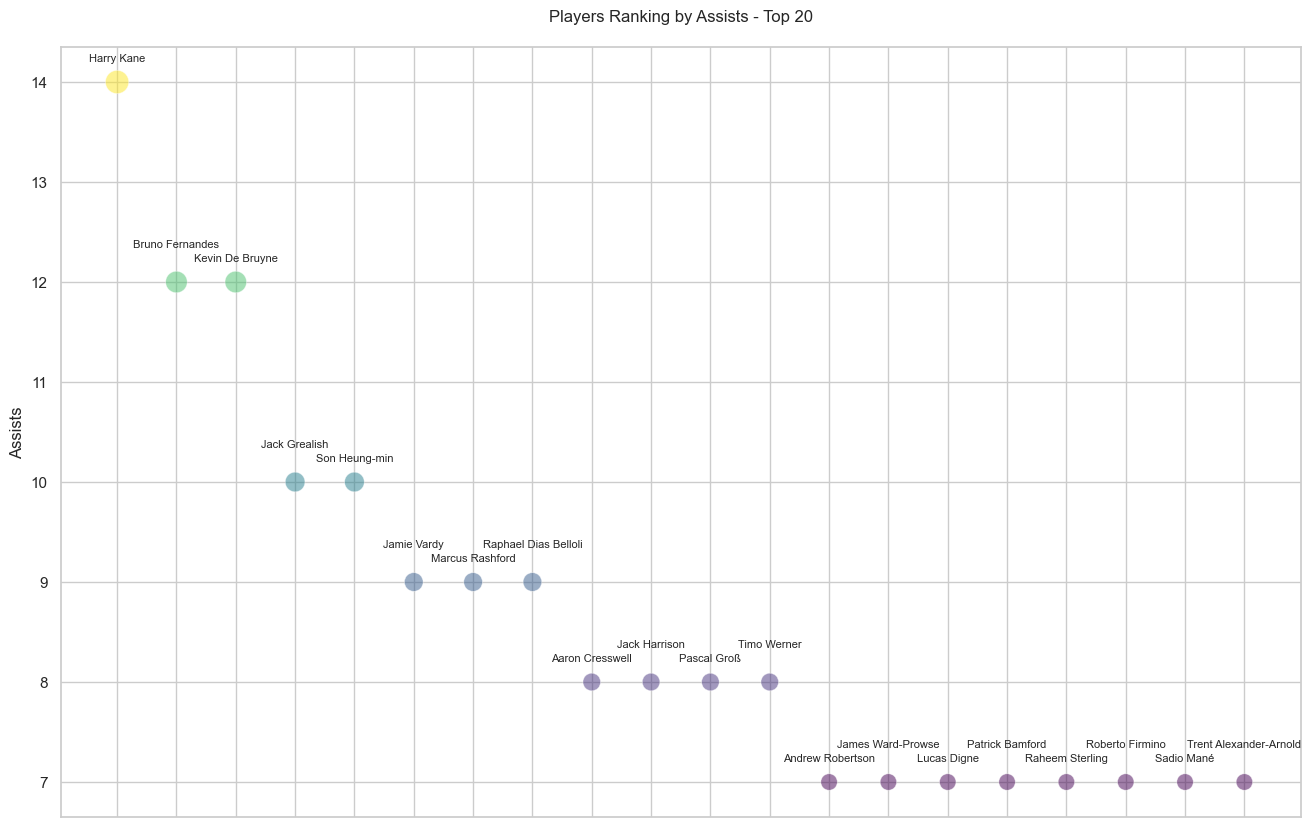

In [608]:
top20assists_plyr = players_stat.nlargest(20, "Assists").reset_index()

fig, ax = plt.subplots(figsize=(16, 10))

bubble_sizes = [assist * 20 for assist in top20assists_plyr["Assists"]] 
scatter = ax.scatter(top20assists_plyr["Name"], top20assists_plyr["Assists"], s=bubble_sizes, alpha=0.5, c=bubble_sizes, cmap='viridis', edgecolors='w', linewidth=0.5)

# labels and title
plt.ylabel('Assists')
plt.title('Players Ranking by Assists - Top 20\n', fontsize=12)
plt.xticks(rotation=90)

for i, team in enumerate(top20assists_plyr["Name"]):
    y_offset = 15 if i % 2 == 0 else 25
    ax.annotate(team, (top20assists_plyr["Name"][i], top20assists_plyr["Assists"][i]), textcoords="offset points", xytext=(0, y_offset), ha='center', fontsize=8)

ax.set_xticklabels([])

plt.show()


#### Scatter Plot of Goal Contribution (Goals + Assists) - Top 20

In [315]:
goal_contribution = df.groupby("Name").agg({"Goals": "sum", "Assists": "sum"}).reset_index()
goal_contribution["Goals Contribution"] = goal_contribution.Goals + goal_contribution.Assists
goal_contribution_20 = goal_contribution.nlargest(20, "Goals Contribution").reset_index()

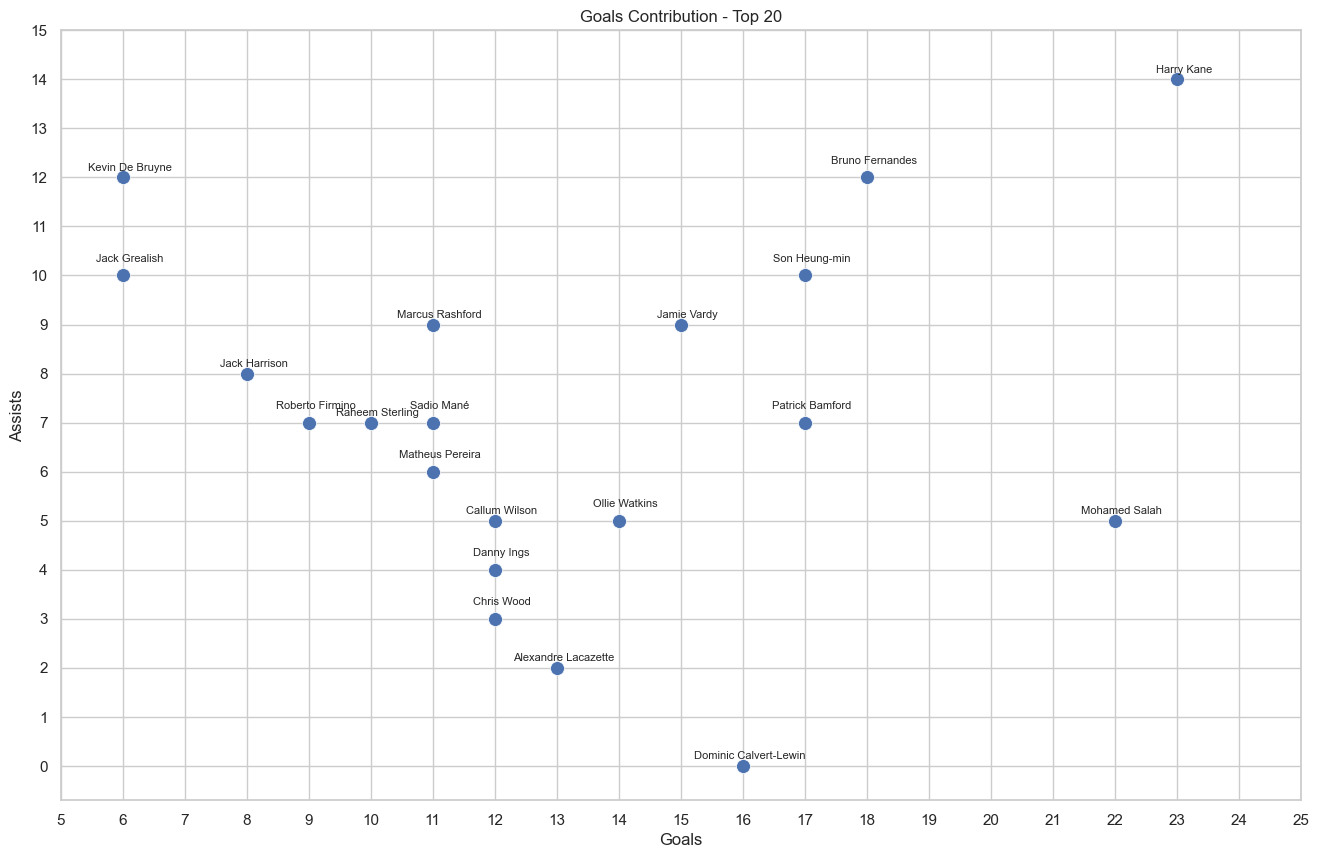

In [357]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(x='Goals', y='Assists', data=goal_contribution_20, ax=ax, s=100, color='b', edgecolor='w', linewidth=0.5)

for i, player in enumerate(goal_contribution_20['Name']):
    y_offset = 5 if i % 2 == 0 else 10
    ax.annotate(player, (goal_contribution_20['Goals'][i], goal_contribution_20['Assists'][i]), textcoords="offset points", xytext=(5,y_offset), ha='center', fontsize=8)

# labels and title
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Goals Contribution - Top 20')
plt.xticks(range(5, 26))
plt.yticks(range(0, 16))

plt.show()

#### Scatter Plot of Goal Contribution U20 - Top 10

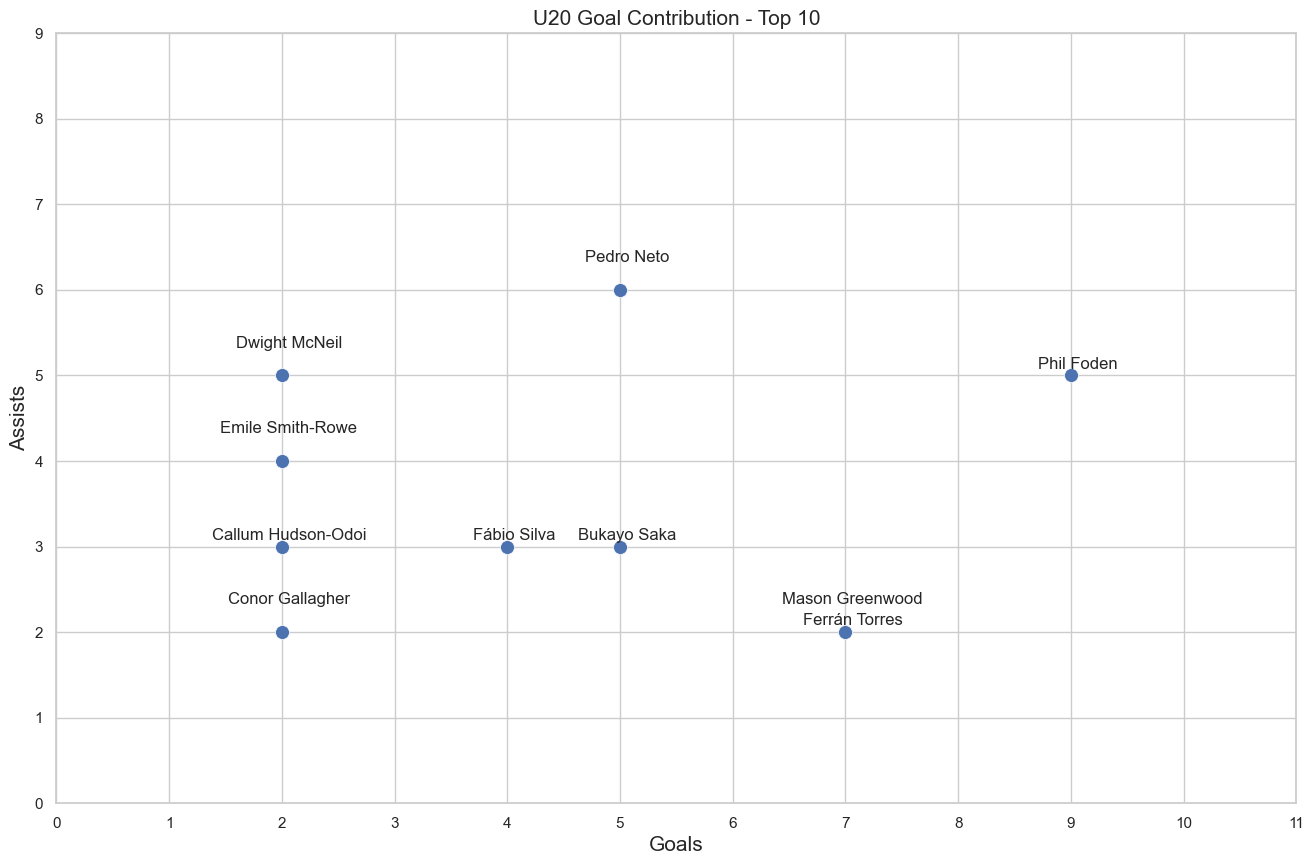

In [388]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(x="Goals", y="Assists", data=under20stats_top10, color="b", ax=ax, s=100, edgecolor='w', linewidth=0.5)

for i, player in enumerate(under20stats_top10["Name"]):
    y_offset = 5 if i % 2 == 0 else 20
    ax.annotate(player, (under20stats_top10["Goals"][i], under20stats_top10["Assists"][i]), textcoords="offset points", xytext=(5,y_offset), ha="center")

plt.xlabel("Goals", fontsize=15)
plt.ylabel("Assists", fontsize=15)
plt.title("U20 Goal Contribution - Top 10", fontsize=15)
plt.xticks([i * 1 for i in range(0,12)])
plt.yticks([i * 1 for i in range(0,10)])

plt.show()

#### Goals per Match for Top 10 Goal Scorers

In [525]:
top_20_goalspermatch = df[["Name", "GoalsPerMatch", "Goals", "Matches"]].nlargest(n=20, columns="Goals").reset_index()

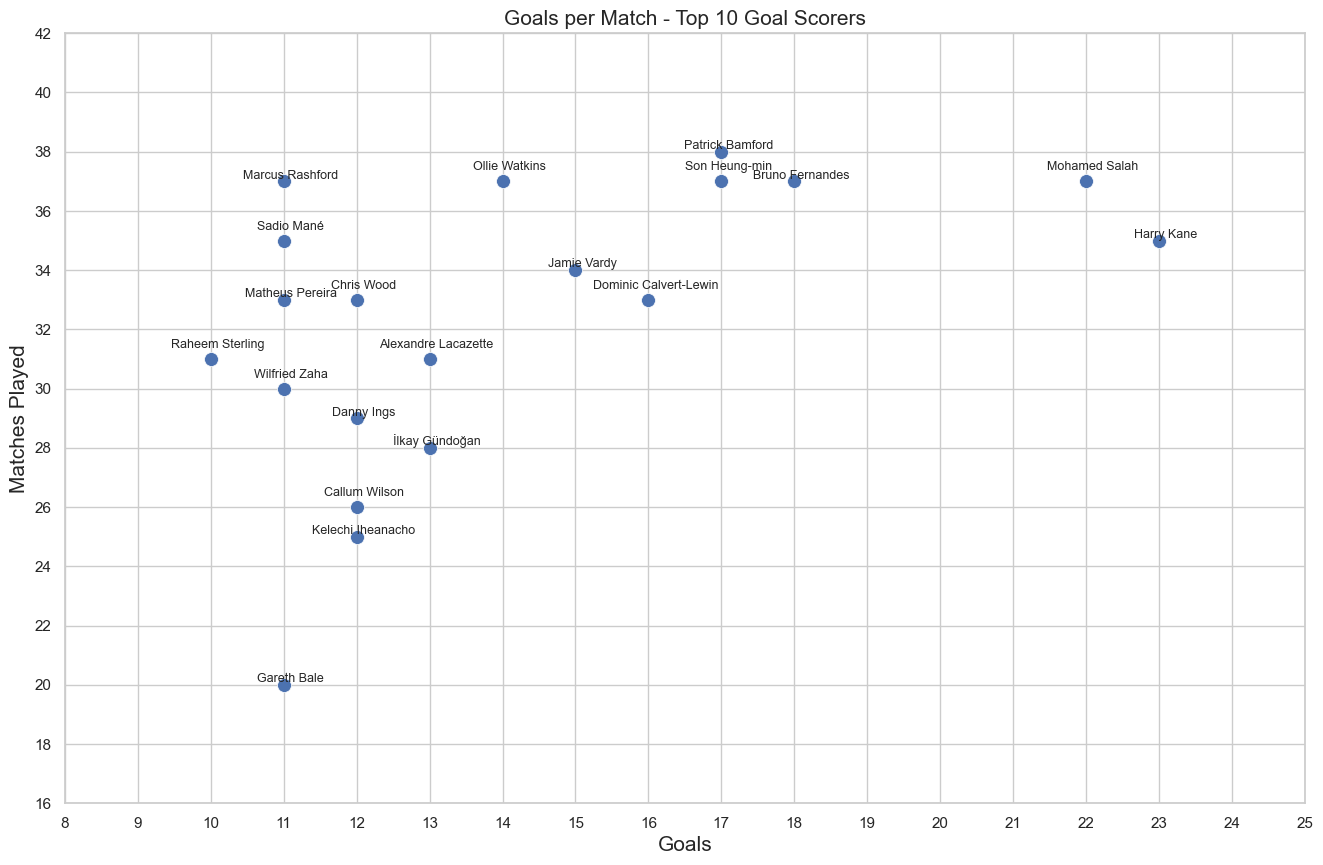

In [617]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(x="Goals", y="Matches", data=top_20_goalspermatch, color="b", ax=ax, s=100, edgecolor='w', linewidth=0.5)

for i, player in enumerate(top_20_goalspermatch["Name"]):
    y_offset = 2 if i % 2 == 0 else 8
    ax.annotate(player, (top_20_goalspermatch["Goals"][i], top_20_goalspermatch["Matches"][i]), textcoords="offset points", xytext=(5,y_offset), ha="center", fontsize=9)

plt.xlabel("Goals", fontsize=15)
plt.ylabel("Matches Played", fontsize=15)
plt.title("Goals per Match - Top 10 Goal Scorers", fontsize=15)
plt.xticks([i * 1 for i in range(8,26)])
plt.yticks([i * 2 for i in range(8,22)])

plt.show()

In [590]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000


#### xG of Top 20 Goal Scorers

In [598]:
top_20_xGoals = df[["Name", "xG", "Goals"]].nlargest(n=20, columns="Goals").reset_index()

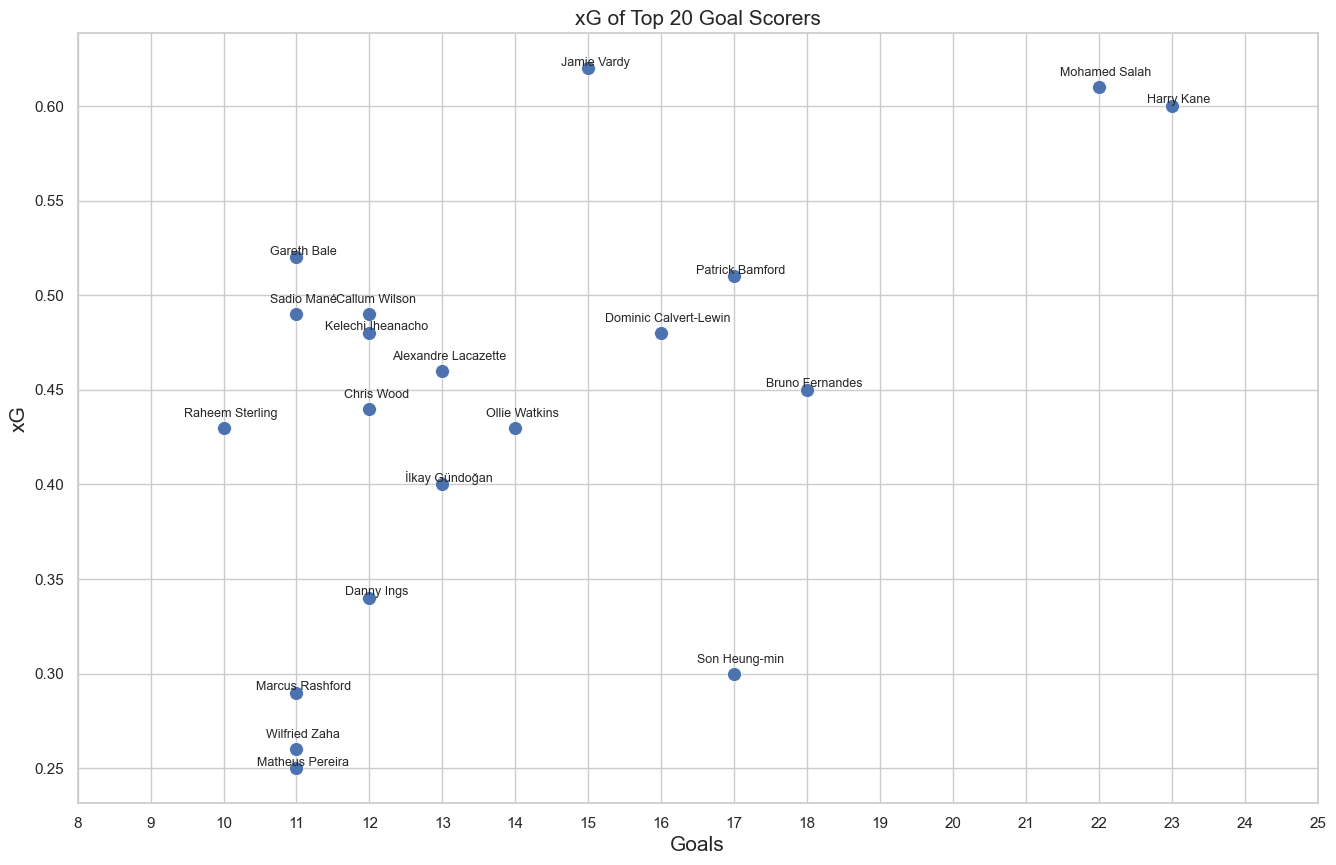

In [599]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(x="Goals", y="xG", data=top_20_xGoals, color="b", ax=ax, s=100, edgecolor='w', linewidth=0.5)

for i, player in enumerate(top_20_xGoals["Name"]):
    y_offset = 2 if i % 2 == 0 else 8
    ax.annotate(player, (top_20_xGoals["Goals"][i], top_20_xGoals["xG"][i]), textcoords="offset points", xytext=(5,y_offset), ha="center", fontsize=9)

plt.xlabel("Goals", fontsize=15)
plt.ylabel("xG", fontsize=15)
plt.title("xG of Top 20 Goal Scorers", fontsize=15)
plt.xticks([i * 1 for i in range(8,26)])
# plt.yticks([i * 1 for i in range(8,22)])

plt.show()

#### xA of Top 20 Goal Creators

In [604]:
top_20_xAssists = df[["Name", "xA", "Assists"]].nlargest(n=20, columns="Assists").reset_index()

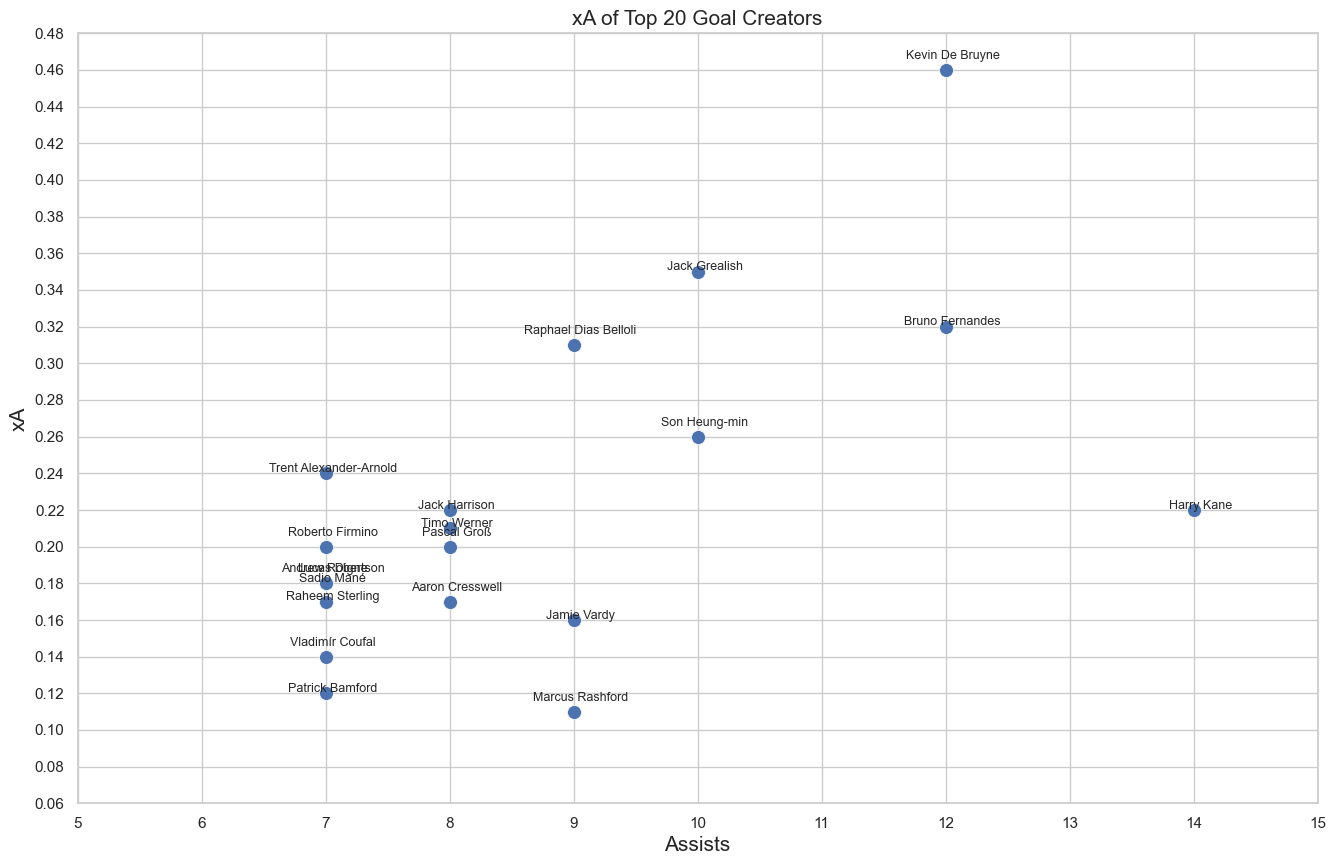

In [636]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(x="Assists", y="xA", data=top_20_xAssists, color="b", ax=ax, s=100, edgecolor='w', linewidth=0.5)

for i, player in enumerate(top_20_xAssists["Name"]):
    y_offset = 1 if i % 2 == 0 else 8
    ax.annotate(player, (top_20_xAssists["Assists"][i], top_20_xAssists["xA"][i]), textcoords="offset points", xytext=(5,y_offset), ha="center", fontsize=9)


plt.xlabel("Assists", fontsize=15)
plt.ylabel("xA", fontsize=15)
plt.title("xA of Top 20 Goal Creators", fontsize=15)
plt.xticks([i * 1 for i in range(5,16)])
plt.yticks([i * 0.02 for i in range(3, 25)])

plt.show()

#### Pie Chart of Yellow Cards vs Red Cards

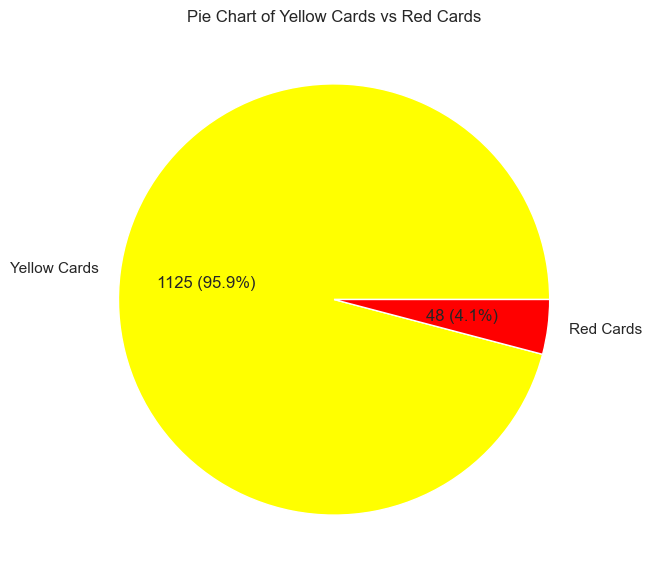

In [611]:
plt.figure(figsize=(14,7))

colors = ['yellow', 'red']
sizes = [yellowcards, redcards]

yellowcards = df.Yellow_Cards.sum()
redcards = df.Red_Cards.sum()

data = [yellowcards, redcards]
label = ["Yellow Cards", "Red Cards"]
color = sns.color_palette("Set1")

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val} ({pct:.1f}%)'
    return my_format

plt.pie(data, labels = label, colors = colors, autopct = autopct_format(sizes))
plt.title("Pie Chart of Yellow Cards vs Red Cards")
plt.show()

#### Red and Yellow Cards by Clubs

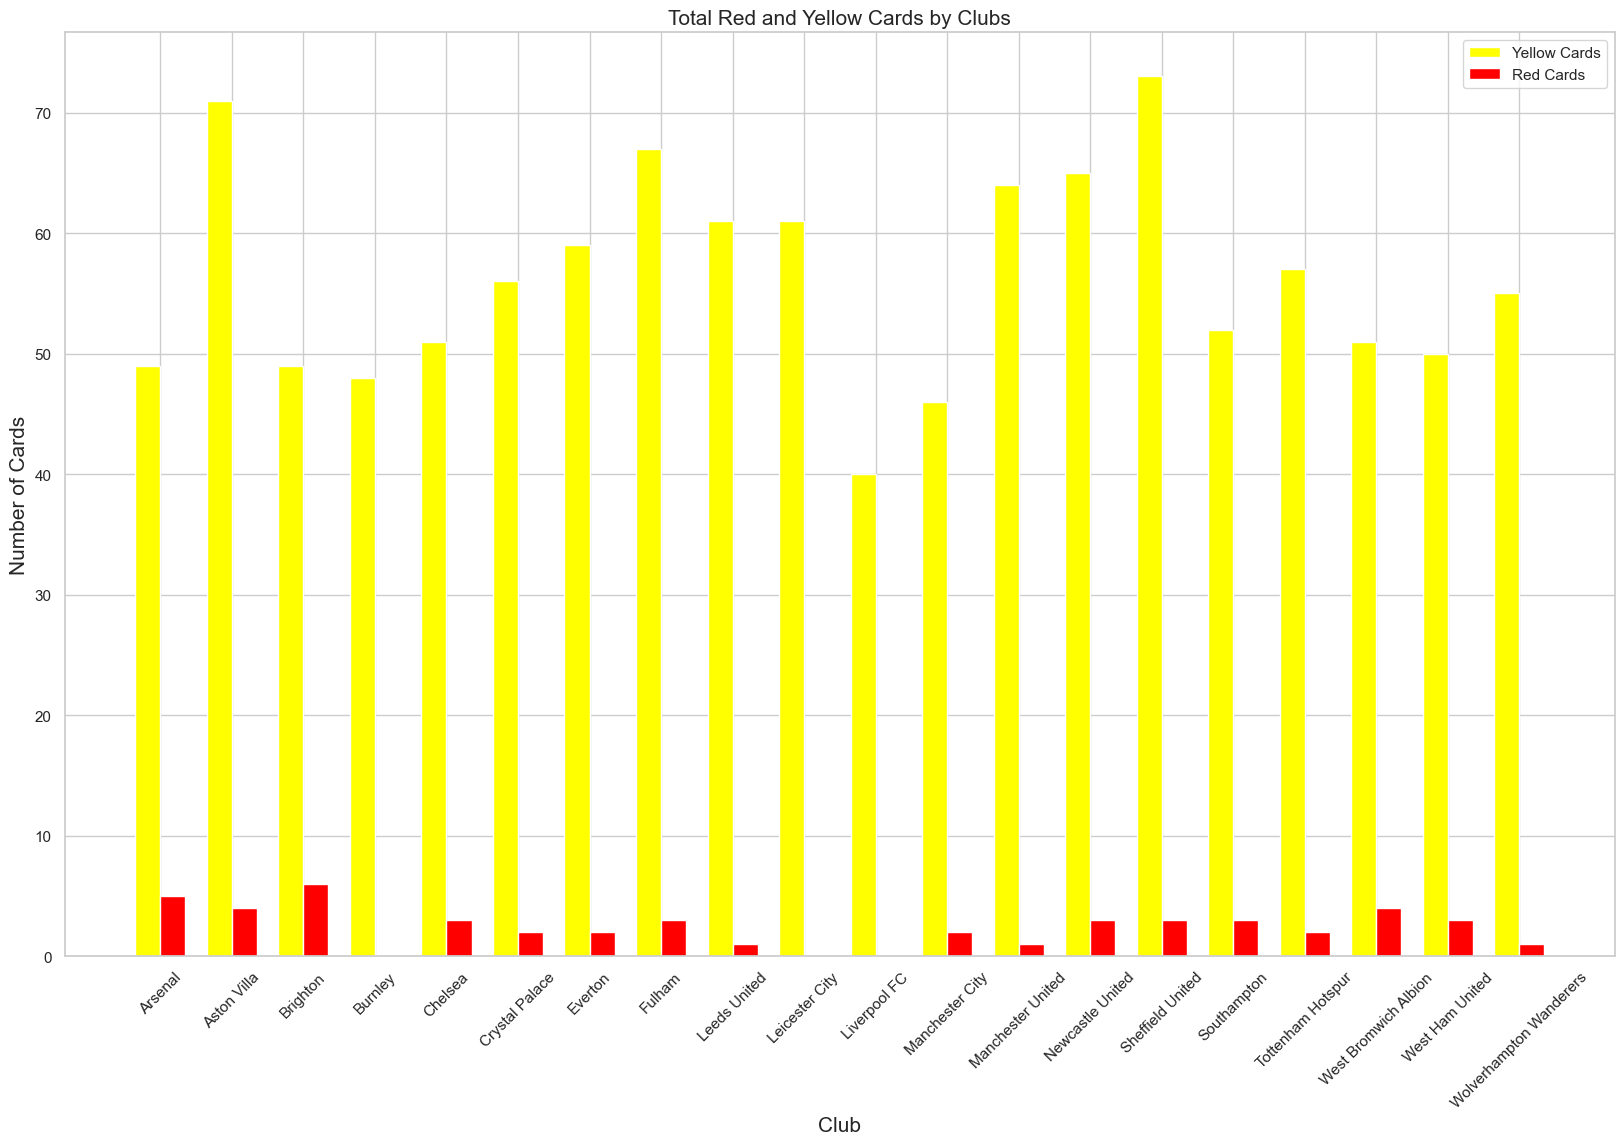

In [526]:
import matplotlib.pyplot as plt
import numpy as np

cards = df.groupby("Club").agg({"Yellow_Cards": "sum", "Red_Cards": "sum"}).reset_index()
# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(cards.Club))

# Create the clustered bar chart
fig, ax = plt.subplots()

bar1 = ax.bar(index, cards.Yellow_Cards, bar_width, label='Yellow Cards', color='yellow')
bar2 = ax.bar(index + bar_width, cards.Red_Cards, bar_width, label='Red Cards', color='red')

# labels, title, and legend
ax.set_xlabel('Club', fontsize=15)
ax.set_ylabel('Number of Cards', fontsize=15)
ax.set_title('Total Red and Yellow Cards by Clubs', fontsize=15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cards.Club)
ax.legend()

plt.xticks(rotation=45)

plt.show()


### Conclusion
_This analysis of the English Premier League 20/21 season provides a comprehensive understanding of the key performance metrics and trends that shaped the competition. By examining the goals scored, how it was scored, the Expected Goals(xG), assists and Expected Assists, we have identified the standout players and teams that made significant impacts. This season was characterized by its intense competition and the remarkable consistency of top-performing teams._